In [1]:
import pandas as pd

# File paths
ola_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Ola.xlsx"
rapido_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Rapido1.xlsx"
uber_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Uber.xlsx"

def preprocess_data(path):
    # Load dataset
    df = pd.read_excel(path)

    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    # Strip string columns of extra spaces
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].str.strip().str.lower()

    # Drop exact duplicates
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)

    print(f"{path.split('/')[-1]}: Removed {before - after} duplicates")

    # Handle missing values (drop rows where all values are NaN)
    df = df.dropna(how="all")

    # Reset index
    df = df.reset_index(drop=True)

    return df

# Preprocess each dataset
ola_clean = preprocess_data(ola_path)
rapido_clean = preprocess_data(rapido_path)
uber_clean = preprocess_data(uber_path)

# Save cleaned versions (optional)
ola_clean.to_excel(r"C:\Users\har15\Downloads\7th\BA\main-proj\Ola-cleaned.xlsx", index=False)
rapido_clean.to_excel(r"C:\Users\har15\Downloads\7th\BA\main-proj\Rapido-cleaned.xlsx", index=False)
uber_clean.to_excel(r"C:\Users\har15\Downloads\7th\BA\main-proj\Uber-cleaned.xlsx", index=False)
 

C:\Users\har15\Downloads\7th\BA\main-proj\Ola.xlsx: Removed 0 duplicates
C:\Users\har15\Downloads\7th\BA\main-proj\Rapido1.xlsx: Removed 0 duplicates
C:\Users\har15\Downloads\7th\BA\main-proj\Uber.xlsx: Removed 0 duplicates


In [6]:
!pip install wordcloud

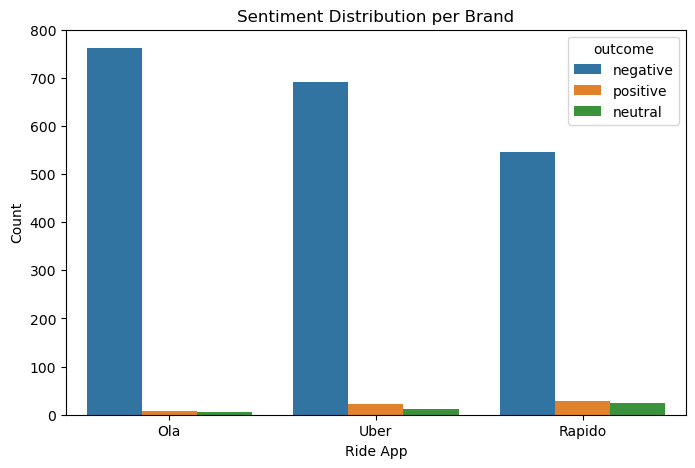

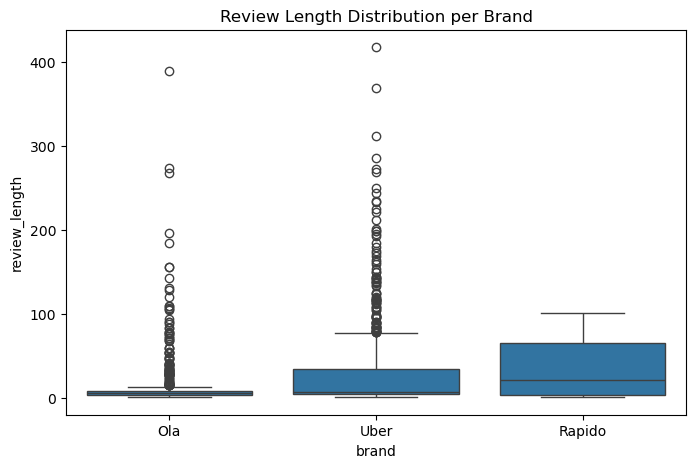

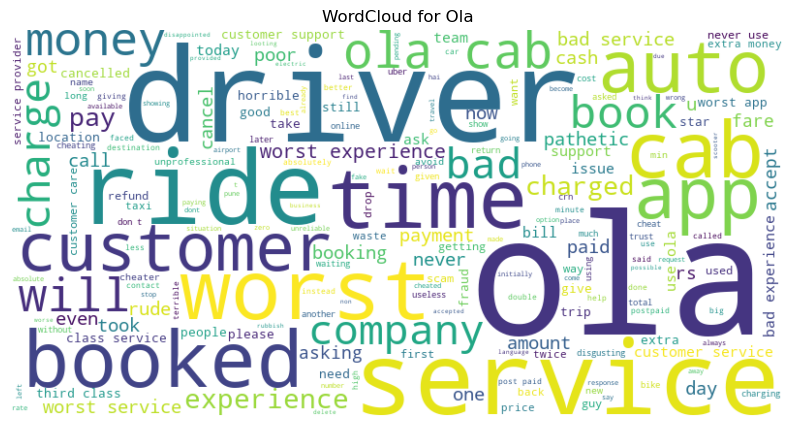

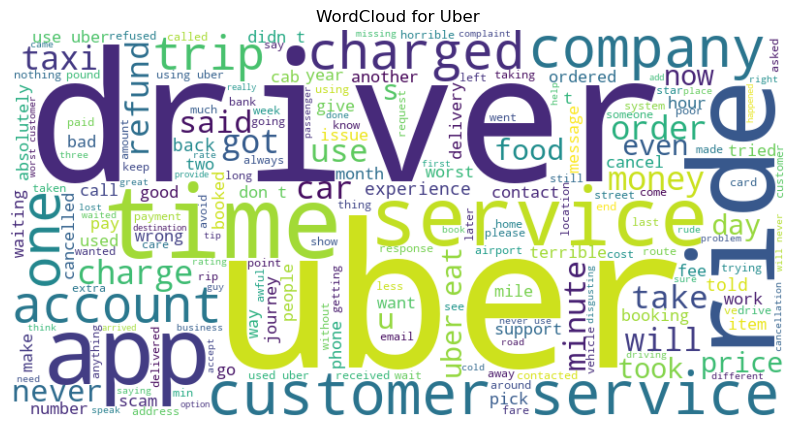

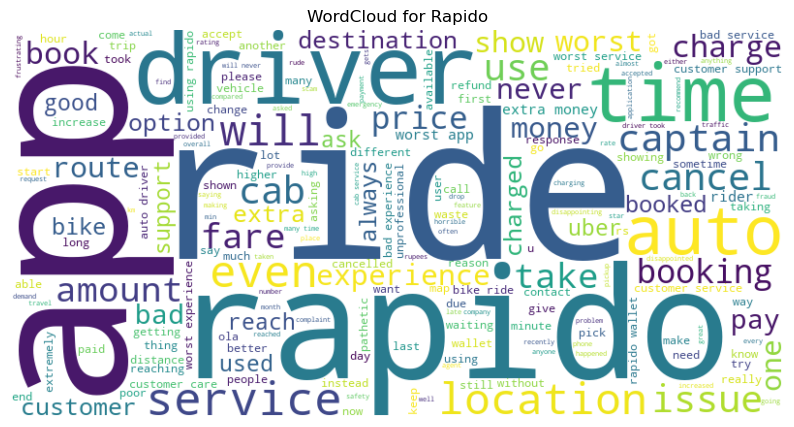

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try to import wordcloud, but handle if missing
try:
    from wordcloud import WordCloud
    has_wordcloud = True
except ImportError:
    print("⚠️ wordcloud not installed. Skipping wordcloud generation.")
    has_wordcloud = False

# File paths
ola_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Ola-cleaned.xlsx"
uber_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Uber-cleaned.xlsx"
rapido_path = r"C:\Users\har15\Downloads\7th\BA\main-proj\Rapido-cleaned.xlsx"

# Load data
ola = pd.read_excel(ola_path)
uber = pd.read_excel(uber_path)
rapido = pd.read_excel(rapido_path)

# Add brand column
ola['brand'] = 'Ola'
uber['brand'] = 'Uber'
rapido['brand'] = 'Rapido'

# Combine
df = pd.concat([ola, uber, rapido], ignore_index=True)

# --- Sentiment Distribution ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='brand', hue='outcome')
plt.title("Sentiment Distribution per Brand")
plt.xlabel("Ride App")
plt.ylabel("Count")
plt.show()

# --- Review Length Distribution ---
df['review_length'] = df['comment'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='brand', y='review_length')
plt.title("Review Length Distribution per Brand")
plt.show()

# --- WordClouds (optional) ---
if has_wordcloud:
    for brand in df['brand'].unique():
        text = " ".join(df[df['brand']==brand]['comment'].astype(str))
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for {brand}")
        plt.show()


C:\Users\har15\AppData\Local\Temp\ipykernel_7616\3663980755.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores, x='brand', y='sentiment_score', palette="coolwarm")


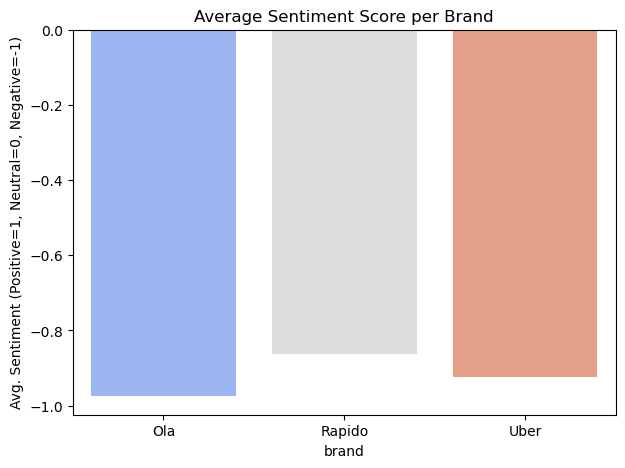

C:\Users\har15\AppData\Local\Temp\ipykernel_7616\3663980755.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_lengths, x='brand', y='review_length', palette="mako")


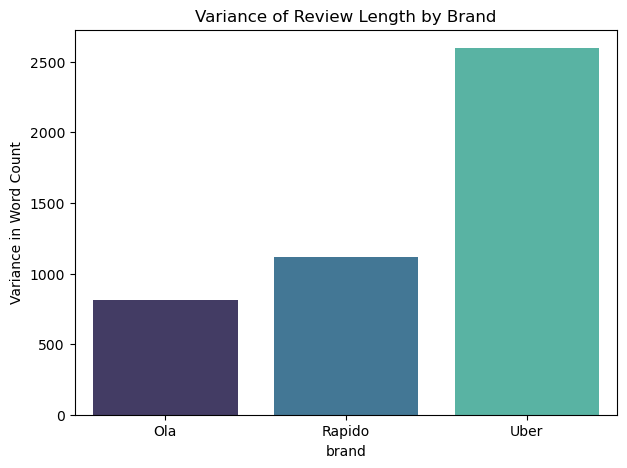

TypeError: Invalid object type at position 0

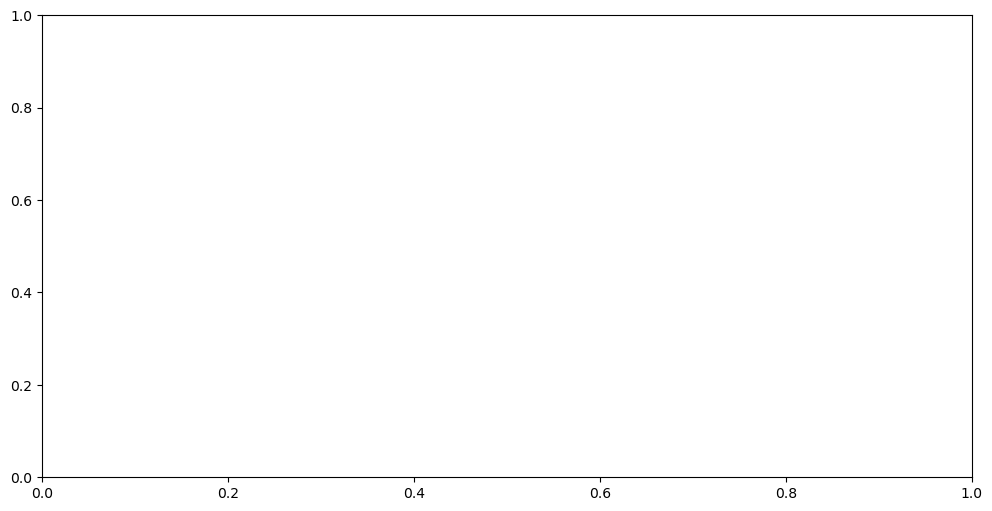

In [3]:
import numpy as np

# 1. Average Sentiment Score per Brand
sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
df['sentiment_score'] = df['outcome'].str.lower().map(sentiment_map)

avg_scores = df.groupby('brand')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=avg_scores, x='brand', y='sentiment_score', palette="coolwarm")
plt.title("Average Sentiment Score per Brand")
plt.ylabel("Avg. Sentiment (Positive=1, Neutral=0, Negative=-1)")
plt.show()

# 2. Variance of Review Length by Brand
var_lengths = df.groupby('brand')['review_length'].var().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=var_lengths, x='brand', y='review_length', palette="mako")
plt.title("Variance of Review Length by Brand")
plt.ylabel("Variance in Word Count")
plt.show()

# 3. Monthly Sentiment Trend per Brand
monthly = df.groupby([df['month'], 'brand', 'outcome']).size().reset_index(name='count')
monthly_total = monthly.groupby(['month','brand'])['count'].transform('sum')
monthly['percent'] = monthly['count'] / monthly_total * 100

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='month', y='percent', hue='outcome', style='brand', marker="o")
plt.title("Monthly Sentiment Trend per Brand")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# 4. Outcome vs Review Length (strip plot)
plt.figure(figsize=(9,5))
sns.stripplot(data=df, x='outcome', y='review_length', hue='brand', jitter=True, alpha=0.6)
plt.title("Review Length vs Sentiment Outcome (by Brand)")
plt.ylabel("Word Count")
plt.show()

# 5. Brand vs Sentiment Heatmap (percentages)
heat = df.groupby(['brand','outcome']).size().reset_index(name='count')
heat_total = heat.groupby('brand')['count'].transform('sum')
heat['percent'] = heat['count'] / heat_total * 100
pivot_perc = heat.pivot(index='brand', columns='outcome', values='percent')

plt.figure(figsize=(6,4))
sns.heatmap(pivot_perc, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Percentage %'})
plt.title("Heatmap: Brand vs Sentiment (Percentage)")
plt.show()
